# <font color = #119fbf> **Manipulação de Dados com Pandas**</font>

* Programa de Pós-Graduação em Engenharia Elétrica e de Computação (PPGEEC)
* Introdução à Ciências de Dados - UFC Campus Sobral – 2023.1
* Andressa Gomes Moreira

## Instalação

In [1]:
#!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.__version__

'1.5.3'

## Estruturas de Dados

### Series

- Matriz rotulada unidimensional capaz de conter qualquer tipo de dados (inteiros, strings, ponto flutuante, objetos). 

- Pode ser criado a partir de uma lista ou array

- O método para criar um Series: *```pd.Series()```*

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

* O *```Series```* envolve uma sequência de **valores** e uma sequência de **índices**

* Podemos acessar os valores com o atributo *```values```* e os índices com o atributo *```index```* 

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

* Como em uma array NumPy, os dados podem ser acessados pelo índice por meio da notação de colchetes

In [6]:
data[0]

0.25

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

* O **índice** é definido explicitamente e não precisa ser um número inteiro, mas pode consistir em valores de qualquer tipo desejado. Por exemplo, podemos usar strings como índice:

In [8]:
s = pd.Series(["Maria", 25, "F", 1.65], index=["Nome", "Idade", "Sexo", "Altura"])
s

Nome      Maria
Idade        25
Sexo          F
Altura     1.65
dtype: object

In [9]:
s['Nome']

'Maria'

In [10]:
s['Idade':'Sexo']

Idade    25
Sexo      F
dtype: object

* É possível construir um *```Series```*  diretamente de um dicionário Python. 

* Um dicionário Python é uma estrutura que mapeia chaves para um conjunto de valores.

In [11]:
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297, 
             'Florida': 170312, 
             'Illinois': 149995}

In [12]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [13]:
area.values

array([423967, 695662, 141297, 170312, 149995], dtype=int64)

In [14]:
area.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [15]:
area['Texas']

695662

### DataFrame

- Estrutura de dados rotulada bidimensional com colunas de tipos diferentes.
- O método para criar um DataFrame: *```pd.DataFrame()```*
- NaN é o marcador de dados ausentes padrão usado em pandas.

In [16]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}


d1 = pd.DataFrame(d)
d1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


- *```Series```* é um análogo de uma matriz unidimensional com índices flexíveis;
- *```DataFrame```* é um análogo de uma matriz bidimensional com índices e nomes de coluna flexíveis.

In [17]:
population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127}
                   
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297}

area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
dtype: int64

In [19]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


* *```DataFrame```* possui um atributos ```index``` e ```columns``` para dar acesso aos rótulos dos índices e das colunas

In [20]:
states.index

Index(['California', 'Texas', 'New York'], dtype='object')

In [21]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297]], dtype=int64)

In [22]:
states.columns

Index(['population', 'area'], dtype='object')

Acessando valores pelo index

In [23]:
states['area']

California    423967
Texas         695662
New York      141297
Name: area, dtype: int64

In [24]:
states['area']['California']

423967

In [25]:
#states['California']['area']

In [26]:
states[1:3]

,population,area
Texas,26448193,695662
New York,19651127,141297


# Aplicação

### Análise de dados Google Play Store Apps

> Link para download do dataset **[Google Play Store Apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps)** 

O dataset possui dados extraídos de 10 mil aplicativos da Google Play Store para análise do mercado Android. O conjunto de dados (**googleplaystore.csv**) é composto por 10841 amostras e 13 atributos. Cada amostra refere-se a um aplicativo no Google Play Store. Existem 13 atributos que descrevem um determinado aplicativo. Os atributos listados na base de dados são:

1. App - Nome do aplicativo 
2. Category	- Categoria à qual o aplicativo pertence
3. Rating	- Classificação geral do usuário do aplicativo
4. Reviews - Número de comentários do usuário para o aplicativo
5. Size	 - Tamanho do aplicativo 
6. Installs	- Número de downloads/instalações do usuário para o aplicativo
7. Type	- Tipo: Pago ou Gratuito
8. Price - Preço do aplicativo
9. Content Rating - Classificação do conteúdo - faixa etária: Crianças / Maiores de 21 anos / Adulto
10. Genres - Gêneros
11. Last Updated - Data em que o aplicativo foi atualizado pela última vez na Play Store
12. Current Ver	- Versão Atual do aplicativo disponível na Play Stor
13. Android Ver - Versão mínima necessária do Android

A partir da análise dos dados contidos no dataset alguns questionamentos podem ser feitos:

1. Quais são as categorias de aplicativos mais instaladas pelos usuários?
2. Quais aplicativos mais caros disponíveis na Play Store?
3. Quantos aplicativos existem de cada gênero para as diferentes faixa etária?
4. Qual a classificação dos aplicativos de acordo com o Tipo (pago ou gratuito)?
5. Quais categorias de aplicativos possuem as melhores e as piores classificações?

#### Carregando o dataset

In [27]:
df = pd.read_csv("googleplaystore.csv", sep=',')

#### Informações Básicas

Formato (linhas, colunas) 

In [28]:
# Retorna uma tupla que representa a dimensionalidade do DataFrame
df.shape

(10841, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Visualizar as cinco primeiras linhas do dataset

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Visualizar as cinco últimas linhas do dataset

In [31]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Informações estatísticas (média, desvio padrão, valores mínimo e máximo, etc)

In [32]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Selecionar Dados 

Selecionando uma ou n colunas por índice 

In [33]:
df[['Genres', 'Category']].head()

,Genres,Category
0,Art & Design,ART_AND_DESIGN
1,Art & Design;Pretend Play,ART_AND_DESIGN
2,Art & Design,ART_AND_DESIGN
3,Art & Design,ART_AND_DESIGN
4,Art & Design;Creativity,ART_AND_DESIGN


Selecionando colunas usando notação de ponto

In [34]:
df.Category.head()

0    ART_AND_DESIGN
1    ART_AND_DESIGN
2    ART_AND_DESIGN
3    ART_AND_DESIGN
4    ART_AND_DESIGN
Name: Category, dtype: object

Verificando os valores presentes em uma coluna

In [35]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [36]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

#### Limpeza dos Dados

Atributos que possuem amostras com valores nulos

In [37]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Ordenar pelos valores ao longo de um dos eixos.

In [38]:
total = df.isnull().sum().sort_values(ascending=False)
total.head()

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
dtype: int64

Porcentagem de valores Nulos

In [39]:
porcent = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

porcent_df = pd.DataFrame({'Total': total, 'Porcentagem': porcent})
porcent_df.head()

,Total,Porcentagem
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224


Remover valores ausentes

~~~python
df.dropna(axis=0, how ='any', inplace = True)
~~~

- axis: 

    * 0 = 'Linhas': Descarte as linhas que contêm valores ausentes.
    * 1 = 'Colunas': Descarte as colunas que contêm valores ausentes.

- how:

    * 'any' : Se algum valor NA estiver presente, elimine essa linha ou coluna.
    * 'all' : Se todos os valores forem NA, elimine essa linha ou coluna.

- inplace: 
    * Modificar o DataFrame em vez de criar um novo.


In [40]:
df.dropna(axis=0, how ='any', inplace = True)

In [41]:
total = df.isnull().sum().sort_values(ascending=False)
porcent = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

porcent_df = pd.DataFrame({'Total': total, 'Porcentagem': porcent})
porcent_df.head()

,Total,Porcentagem
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0


Verificar a dimensionalidade do DataFrame após a exclusão dos dados nulos

In [42]:
df.shape

(9360, 13)

Removendo duplicados

~~~python
df.drop_duplicates(inplace = True)
~~~

In [43]:
df.duplicated(subset=['Rating'])

0        False
1        False
2        False
3        False
4        False
         ...  
10834     True
10836     True
10837     True
10839     True
10840     True
Length: 9360, dtype: bool

In [44]:
df.drop_duplicates(inplace = True)

Verificar a dimensionalidade do DataFrame após a exclusão dos dados duplicados

In [45]:
df.shape

(8886, 13)

## Podemos fazer alguns questionamentos:

### 1. Quais são as categorias de aplicativos mais instaladas pelos usuários?

**Installs** - Número de downloads/instalações do usuário para o aplicativo

In [46]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8886, dtype: object

In [47]:
df['Installs'][0]
df['Installs'][0].replace(",","")
df['Installs'][0].replace("+","")

'10,000'

Limpeza nos dados da categoria Instalação

In [48]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

C:\Users\andre\AppData\Local\Temp\ipykernel_8100\899707373.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df.Installs.str.replace("+","")


dtype('float64')

In [49]:
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8886, dtype: float64

In [50]:
category_list = list(df['Category'].unique())
category_install = []

for i in category_list:
    x = df[df['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
df_category = pd.DataFrame({'category': category_list,'install':category_install})
df_category.sort_values(by="install",ascending=False).head(30)

,category,install
6,COMMUNICATION,7.867180e+07
20,SOCIAL,5.128624e+07
30,VIDEO_PLAYERS,3.888686e+07
27,PRODUCTIVITY,3.731458e+07
22,PHOTOGRAPHY,3.197777e+07
24,TRAVEL_AND_LOCAL,3.103346e+07
17,GAME,2.937045e+07
31,NEWS_AND_MAGAZINES,2.520145e+07
9,ENTERTAINMENT,2.212306e+07
25,TOOLS,1.562104e+07


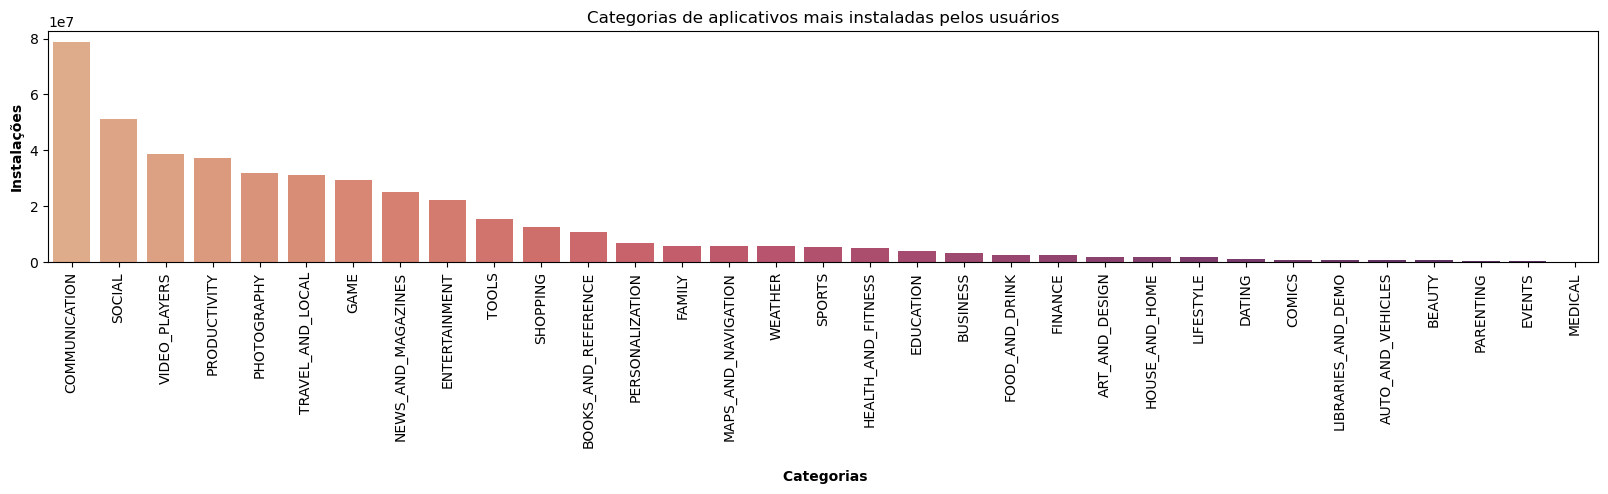

In [51]:
fig, ax = plt.subplots(figsize =(20,3))

sns.barplot(x="category", 
            y="install", data=df_category, palette="flare",
            order = df_category.
            sort_values('install', ascending = False).
            category).set_title("Categorias de aplicativos mais instaladas pelos usuários")

plt.xlabel('\n Categorias', fontsize = 10, fontweight = 'bold')
plt.ylabel('Instalações', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

### 2. Quais são os aplicativos mais caros disponíveis na Play Store?

**Price** - Preço do aplicativo

In [52]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Limpeza e padronização dos valores do atributo "Price", aplicando uma função ao longo do eixo do DataFrame.

In [53]:
df.Price = df.Price.apply(lambda x: x.strip('$'))
df.Price=pd.to_numeric(df.Price)
df.Price.unique().astype(float)

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

Quanto custa o aplicativo mais caro de cada categoria?


```df.groupby()``` - Agrupar o DataFrame usando um mapeador ou uma série de colunas.


In [54]:
df.groupby(["Category"])["Price"].max().head(200).sort_values(ascending=False)

Category
LIFESTYLE              400.00
FINANCE                399.99
FAMILY                 399.99
MEDICAL                 79.99
SPORTS                  29.99
PHOTOGRAPHY             19.99
BUSINESS                17.99
GAME                    17.99
TOOLS                   14.99
MAPS_AND_NAVIGATION     11.99
PERSONALIZATION          9.99
TRAVEL_AND_LOCAL         8.99
PRODUCTIVITY             8.99
HEALTH_AND_FITNESS       7.99
DATING                   7.99
WEATHER                  6.99
VIDEO_PLAYERS            5.99
EDUCATION                5.99
FOOD_AND_DRINK           4.99
ENTERTAINMENT            4.99
PARENTING                4.99
COMMUNICATION            4.99
BOOKS_AND_REFERENCE      4.60
SHOPPING                 2.99
NEWS_AND_MAGAZINES       2.99
ART_AND_DESIGN           1.99
AUTO_AND_VEHICLES        1.99
SOCIAL                   0.99
LIBRARIES_AND_DEMO       0.00
EVENTS                   0.00
COMICS                   0.00
BEAUTY                   0.00
HOUSE_AND_HOME           0.00
N

Valores dos aplicativos mais caros

In [55]:
datat = df[(df.Price >= 19.99)][["Price", "App", "Category"]].sort_values(by='Price', ascending=False)
datat

,Price,App,Category
4367,400.00,I'm Rich - Trump Edition,LIFESTYLE
4362,399.99,💎 I'm rich,LIFESTYLE
5362,399.99,I Am Rich Pro,FAMILY
5359,399.99,I am rich(premium),FINANCE
5358,399.99,I am Rich!,FINANCE
5356,399.99,I Am Rich Premium,FINANCE
5354,399.99,I am Rich Plus,FAMILY
5351,399.99,I am rich,LIFESTYLE
5369,399.99,I am Rich,FINANCE
5364,399.99,I am rich (Most expensive app),FINANCE


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


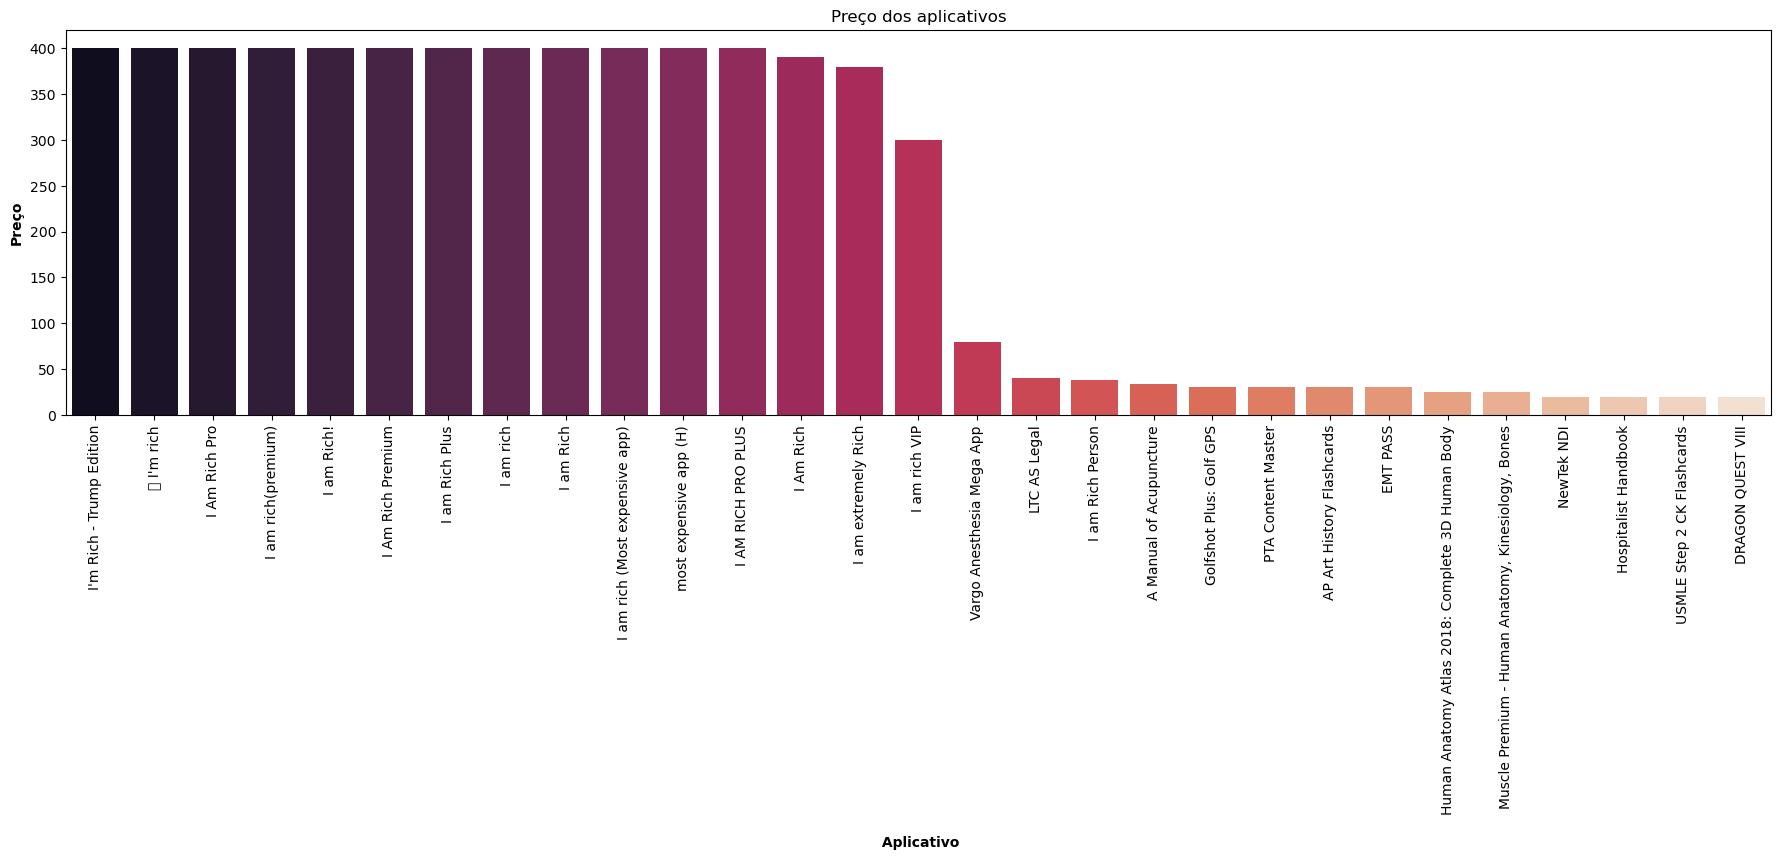

In [56]:
fig, ax = plt.subplots(figsize=(22,5))
sns.barplot(x='App', y='Price', data=datat, palette='rocket').set_title("Preço dos aplicativos")

plt.xlabel('\n Aplicativo', fontsize = 10, fontweight = 'bold')
plt.ylabel('Preço', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

### 3. Quantos aplicativos existem de cada gênero para as diferentes faixa etária?

Verificando os gêneros existentes

In [57]:
generos = df['Genres'].unique()
generos

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

Verificando a quantidade de aplicativos existentes de acordo com a faixa etária

In [58]:
df['Content Rating'].value_counts()

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Verificando a quantidade de aplicativos existentes de acordo com o gênero e a faixa etária

In [59]:
groupby_gen_rating = df.groupby(["Genres"])["Content Rating"].value_counts()

'''for genero in generos:
    print(f'-- Gênero: {genero} --')
    print(f'{groupby_gen_rating}\n')'''

groupby_gen_rating

Genres                     Content Rating
Action                     Teen              158
                           Everyone           92
                           Mature 17+         50
                           Everyone 10+       49
Action;Action & Adventure  Everyone           10
                                            ... 
Weather                    Mature 17+          1
Word                       Everyone           23
                           Mature 17+          2
                           Everyone 10+        1
                           Teen                1
Name: Content Rating, Length: 239, dtype: int64

### 4. Qual a Classificação dos Aplicativos de acordo com o Tipo (pago ou gratuito)?


**Rating** - Classificação geral do usuário do aplicativo

**Type** - Tipo: Pago ou Gratuito

Quantidade de apps de acordo com a avaliação

In [60]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [61]:
df['Rating'].value_counts()

4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

Quantidade de apps de acordo com o tipo

In [62]:
df.Type.value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

Média das notas (avaliação) recebida por cada tipo 

In [63]:
df.groupby(["Type"])["Rating"].mean()

Type
Free    4.182514
Paid    4.261702
Name: Rating, dtype: float64

In [64]:
df.groupby(["Category", "Type"])["Rating"].mean().reset_index()

,Category,Type,Rating
0,ART_AND_DESIGN,Free,4.358621
1,ART_AND_DESIGN,Paid,4.733333
2,AUTO_AND_VEHICLES,Free,4.184722
3,AUTO_AND_VEHICLES,Paid,4.600000
4,BEAUTY,Free,4.278571
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,4.100000
57,VIDEO_PLAYERS,Free,4.062821
58,VIDEO_PLAYERS,Paid,4.100000
59,WEATHER,Free,4.230882


### 5. Quais categorias de app possuem as melhores e as piores classificações?

In [65]:
df.groupby(["Category"])["Rating"].mean().sort_values(ascending=False)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
SHOPPING               4.251485
WEATHER                4.244000
SPORTS                 4.225175
PRODUCTIVITY           4.201796
FAMILY                 4.191264
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.182895
MEDICAL                4.182450
LIBRARIES_AND_DEMO     4.179688
HOUSE_AND_HOME         4.164706
FOOD_AND_DRINK         4.164151
COMICS                 4.155172
COMMUNICATION          4.151466
ENTERTAINMENT          4.136036
NEWS_AND_MAGAZINES     4.128505
FINANCE                4.127445
BUSINESS               4.102593
LIFESTYLE              4.096066
TRAVEL_AND_LOCAL       4.094146
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

Quais aplicativos possuem avaliação mínima?

In [66]:
print("Range: ", df.Rating.min(),"-",df.Rating.max())

Range:  1.0 - 5.0


In [67]:
df[(df.Rating == df.Rating.min())][["App", "Rating", "Category"]]

,App,Rating,Category
625,House party - live chat,1.0,DATING
4127,Speech Therapy: F,1.0,FAMILY
5151,Clarksburg AH,1.0,MEDICAL
5978,Truck Driving Test Class 3 BC,1.0,FAMILY
6319,BJ Bridge Standard American 2018,1.0,GAME
6490,MbH BM,1.0,MEDICAL
7144,CB Mobile Biz,1.0,FINANCE
7383,Thistletown CI,1.0,PRODUCTIVITY
7427,CJ DVD Rentals,1.0,COMMUNICATION
7806,CR Magazine,1.0,BUSINESS


Quais aplicativos possuem avaliação máxima?

In [68]:
df[(df.Rating == df.Rating.max())][["App", "Rating", "Category"]]

,App,Rating,Category
329,Hojiboy Tojiboyev Life Hacks,5.0,COMICS
612,American Girls Mobile Numbers,5.0,DATING
615,Awake Dating,5.0,DATING
633,Spine- The dating app,5.0,DATING
636,Girls Live Talk - Free Text and Video Chat,5.0,DATING
...,...,...,...
10721,Mad Dash Fo' Cash,5.0,GAME
10742,GKPB FP Online Church,5.0,LIFESTYLE
10776,Monster Ride Pro,5.0,GAME
10820,Fr. Daoud Lamei,5.0,FAMILY


C:\Users\andre\AppData\Local\Temp\ipykernel_8100\2116150008.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Category', y='Rating', data=df, palette='rocket', order= df['Category'].value_counts().index)


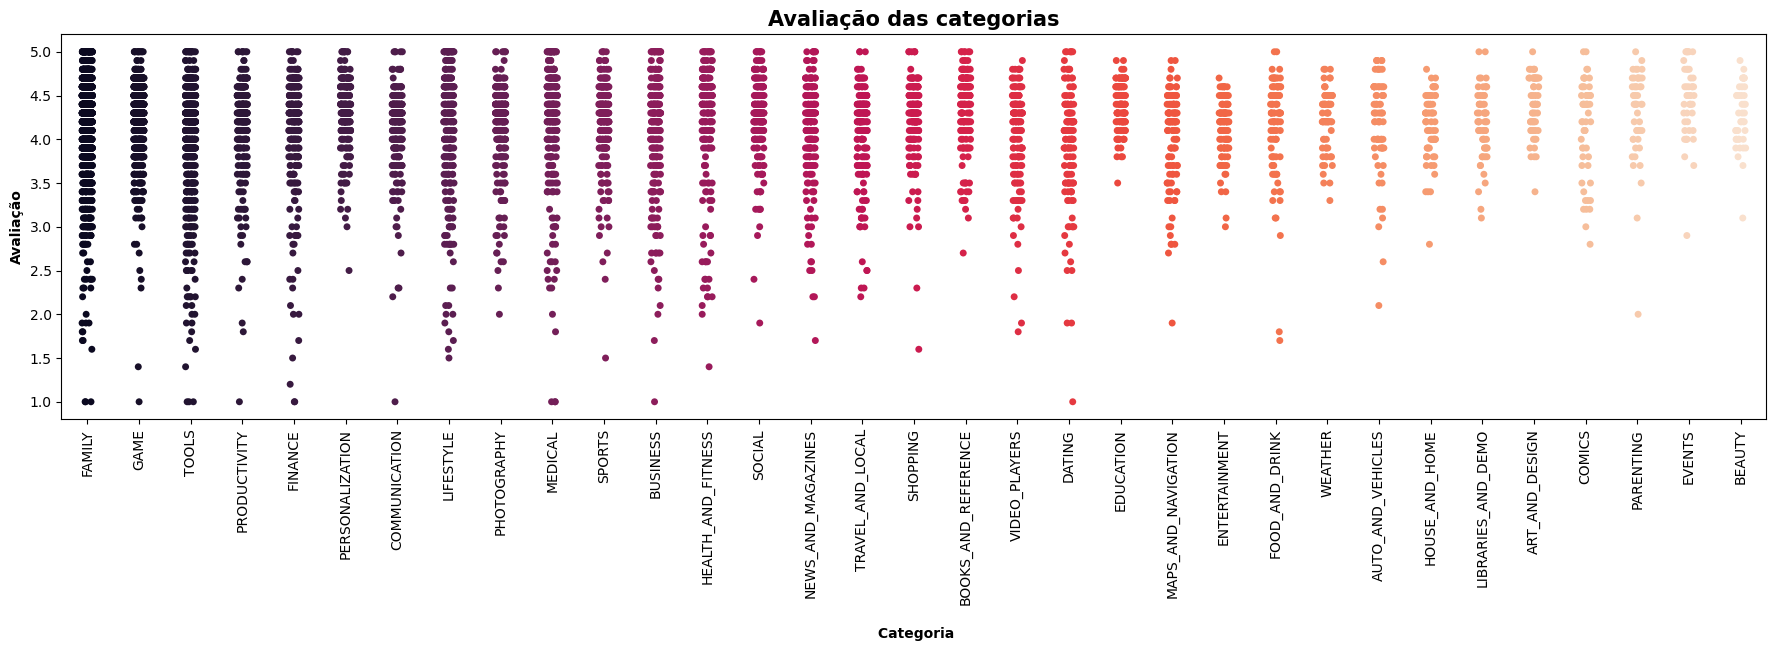

In [69]:
fig, ax = plt.subplots(figsize=(22,5))

sns.stripplot(x='Category', y='Rating', data=df, palette='rocket', order= df['Category'].value_counts().index)

plt.xlabel('\n Categoria', fontsize= 10, fontweight = 'bold')
plt.ylabel('Avaliação', fontsize= 10, fontweight = 'bold')
plt.title('Avaliação das categorias', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()